In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/victormitru/Desktop/Data Science/Code/Machine Learning/Demand Forecasting/train Demand Forecasting.csv')

In [3]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand = True)

In [5]:
df = df.drop(['week'], axis = 1)

In [6]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_sold', axis = 1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
model = RandomForestRegressor(n_jobs = -1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [9]:
model.score(X_test, y_test)

0.7754749896064131

In [10]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

27.14212382093847

In [11]:
df['units_sold'].describe()


count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

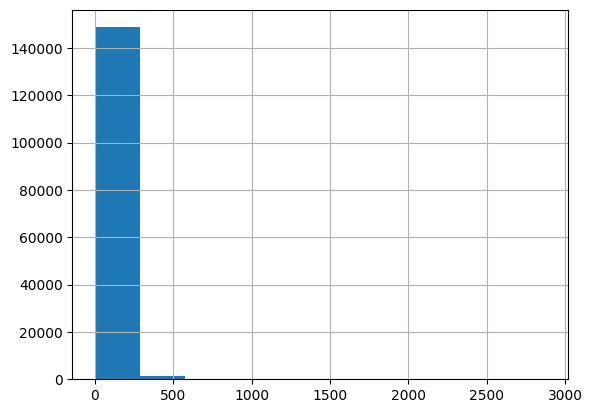

In [12]:
df['units_sold'].hist()


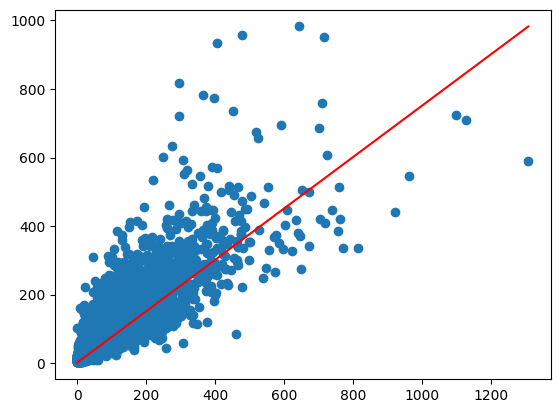

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(y_test.min(), y_test.max()), np.linspace(y_pred.min(), y_pred.max()), color = 'red')

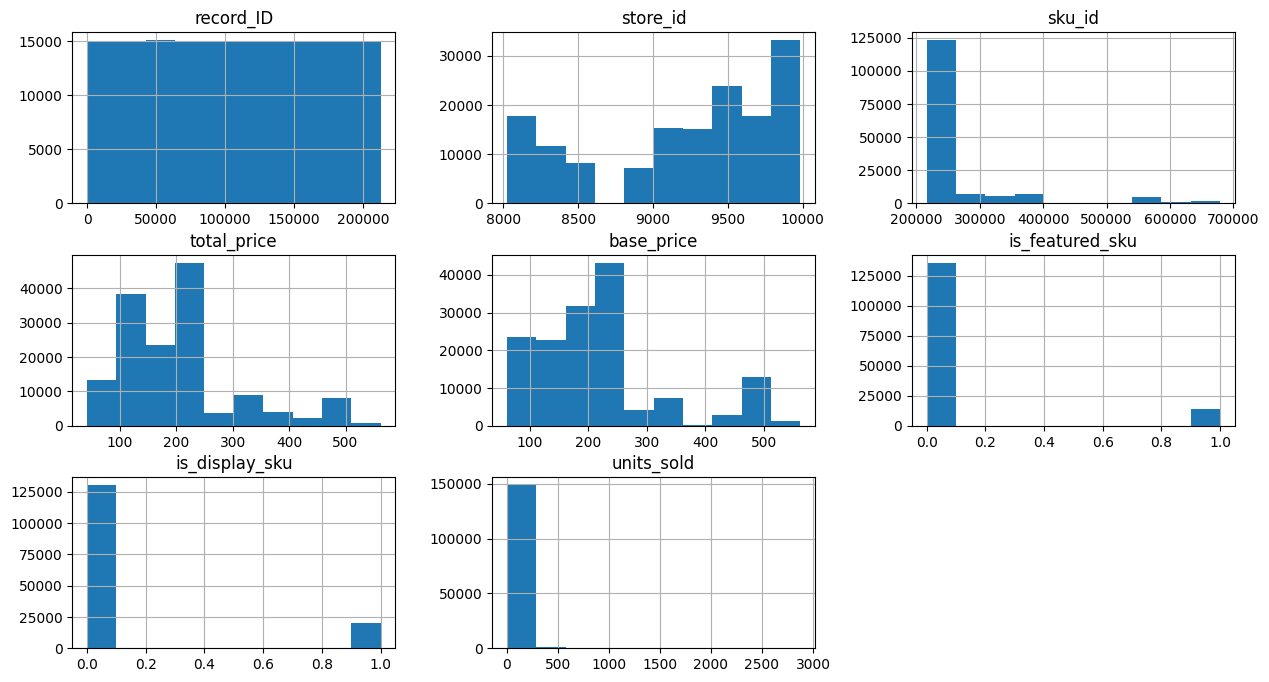

In [14]:
df.hist(figsize = (15, 8))
plt.show()

In [15]:
df = df.drop('record_ID', axis = 1)

In [16]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [17]:
len(df['store_id'].unique())

76

In [18]:
len(df['sku_id'].unique())

28

In [19]:
df['units_sold'].describe()


count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [20]:
df = df[df['units_sold'] < df['units_sold'].quantile(0.99)]

<Axes: >

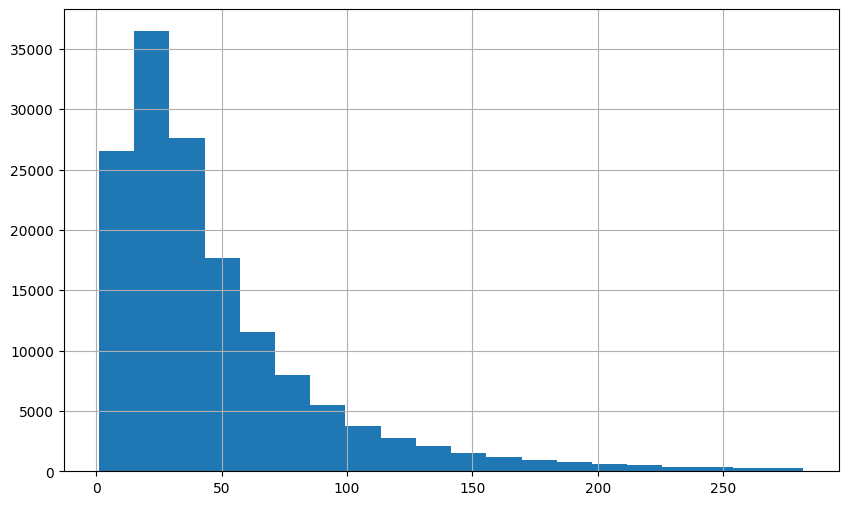

In [21]:
df['units_sold'].hist(bins = 20, figsize = (10, 6))

In [22]:
df.join(pd.get_dummies(df['store_id'], prefix = 'store')).drop('store_id', axis = 1)
df.join(pd.get_dummies(df['sku_id'], prefix = 'item')).drop('sku_id', axis = 1)

,store_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,item_216233,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,8091,99.0375,111.8625,0,0,20,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,8091,99.0375,99.0375,0,0,28,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,8091,133.9500,133.9500,0,0,19,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,8091,133.9500,133.9500,0,0,44,17,01,11,True,...,False,False,False,False,False,False,False,False,False,False
4,8091,141.0750,141.0750,0,0,52,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,235.8375,235.8375,0,0,38,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150146,9984,235.8375,235.8375,0,0,30,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150147,9984,357.6750,483.7875,1,1,31,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150148,9984,141.7875,191.6625,0,1,12,09,07,13,False,...,False,False,False,False,False,False,True,False,False,False


In [23]:
model = RandomForestRegressor(n_jobs = -1)

X, y = df.drop('units_sold', axis = 1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [25]:
model.score(X_test, y_test)

0.8070504144716267

In [26]:
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
rmse

18.75039954893635

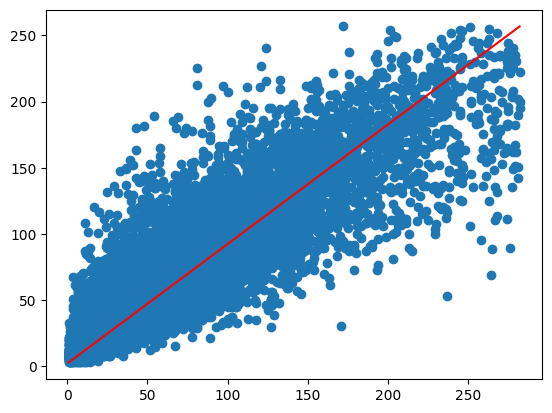

In [27]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(y_test.min(), y_test.max()), np.linspace(y_pred.min(), y_pred.max()), color = 'red')

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2, 3]
}

model = RandomForestRegressor(n_jobs = -1)

grid_search = GridSearchCV(model, param_grid, verbose = 2, cv = 3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   1.0s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   0.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   0.9s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.5s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.6s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   0.8s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   1.0s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [29]:
best_model = grid_search.best_estimator_

In [30]:
grid_search.best_params_

{'min_samples_split': 2, 'n_estimators': 20}

In [31]:
best_model.score(X_test, y_test)

0.7954136854338898